In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
IMG_SIZE = 128  # Tamanho fixo das imagens
BATCH_SIZE = 32  # Tamanho do batch

# Gerador para os dados de treinamento (com aumentação)
train_datagen = ImageDataGenerator(rescale=1./255,)

# Gerador para os dados de teste (apenas normalização)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'imagens/train',  # Caminho para o diretório de treino
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    'imagens/test',  # Caminho para o diretório de teste
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


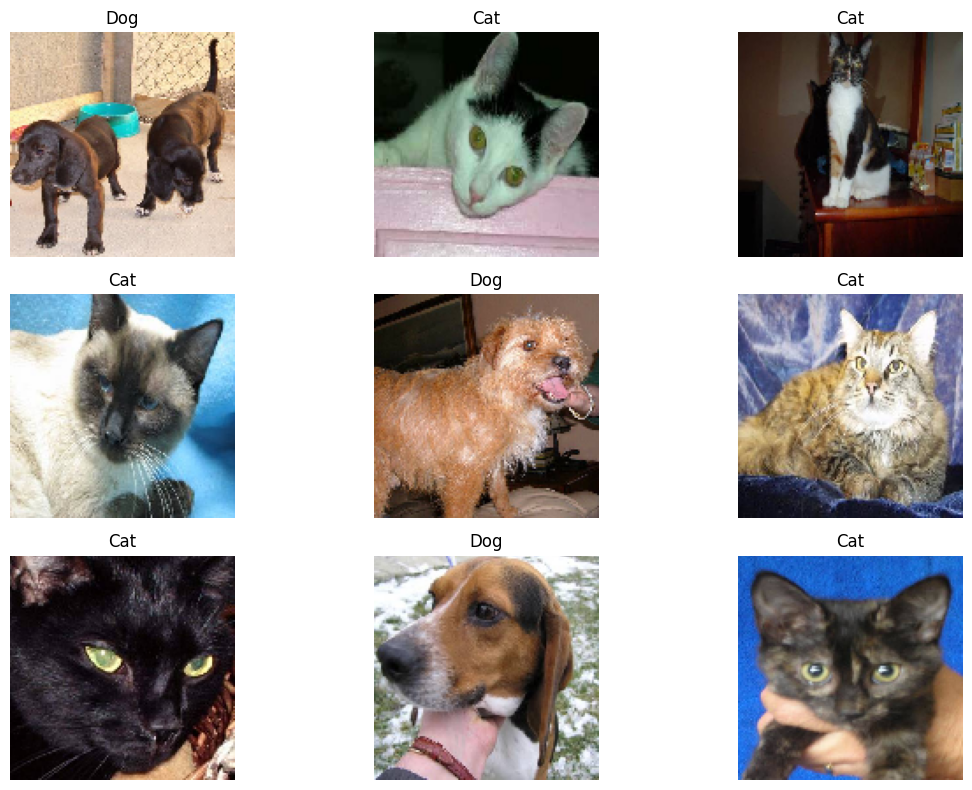

In [13]:
# Obtém um batch de imagens do gerador
images, labels = next(train_generator)

# Configura o tamanho do plot
plt.figure(figsize=(12, 8))

# Plota as primeiras 9 imagens do batch
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])  # Mostra a imagem
    plt.title("Dog" if labels[i] == 1 else "Cat")  # Define o título com base no rótulo
    plt.axis('off')  # Remove os eixos

plt.tight_layout()
plt.show()

In [ ]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congela as camadas para usar como extrator de características

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
history = model.fit(
    train_generator,  # Dados de treino
    validation_data=test_generator,  # Dados de validação
    epochs=10,  # Número de ciclos de treinamento
    steps_per_epoch=len(train_generator),  # Passos por época
    validation_steps=len(test_generator)  # Passos de validação
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 168ms/step - accuracy: 0.9464 - loss: 0.1323 - val_accuracy: 0.9476 - val_loss: 0.1201
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.9732 - loss: 0.0695 - val_accuracy: 0.9648 - val_loss: 0.0861
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.9825 - loss: 0.0495 - val_accuracy: 0.9664 - val_loss: 0.0854
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.9870 - loss: 0.0382 - val_accuracy: 0.9654 - val_loss: 0.0910
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.9921 - loss: 0.0232 -

In [37]:
# Carrega uma nova imagem
img_path = 'imagens/test/dogs/dog.5.jpg'  # Substitua pelo caminho de uma imagem
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0  # Normaliza a imagem
img_array = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão

# Faz a previsão
prediction = model.predict(img_array)
print(prediction[0])
print("Dog" if prediction[0] > 0.5 else "Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.99995154]
Dog


In [28]:
loss, accuracy = model.evaluate(test_generator)
print(f"Perda: {loss}")
print(f"Acurácia: {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9657 - loss: 0.0907
Perda: 0.10055071115493774
Acurácia: 0.9646000266075134


In [29]:
model.save('model_cats_vs_dogs.h5')